# Package imports

In [1]:
# Package imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import svm, metrics
from PIL import Image

In [2]:
def plot_decision_boundary(pred_func, X):
    # Set min and max values and give it some padding
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole gid
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)

# Converting an image to a vector

In [3]:
def image_to_array(image):
    x = np.zeros(image.size[0]*image.size[1])
    k = 0
    for i in range(image.size[0]):
        for j in range(image.size[1]):
            if image.getpixel((i,j))[0] != 255:
                x[k] = 1
            k = k+1
    return x

# Loading dataset (there are 50 samples for each digit)

In [5]:
def load_data():
    X_train = np.array([image_to_array(Image.open('./digit_images/0/0_0.png'))])
    X_test  = np.array([image_to_array(Image.open('./digit_images/0/0_0.png'))])
    y_train = np.array([0])
    y_test  = np.array([0])
    for k in range(10):
        for i in range(35):
            path_image = './digit_images/'+str(k)+'/'+str(k)+'_'+str(i)+'.png'
            X_train = np.append(X_train, np.array([image_to_array(Image.open(path_image))]), axis=0)
            y_train = np.append(y_train, k)
    for k in range(10):
        for i in range(35,50):
            path_image = './digit_images/'+str(k)+'/'+str(k)+'_'+str(i)+'.png'
            X_test = np.append(X_test, np.array([image_to_array(Image.open(path_image))]), axis=0)
            y_test = np.append(y_test, k)
    return X_train, X_test, y_train, y_test

In [6]:
# loading dataset 
X_train, X_test, y_train, y_test = load_data()

# Fitting the SVM model to the dataset

In [17]:
clf = svm.SVC()
clf.fit(X_train, y_train)

SVC()

# Prediction function

In [8]:
def predict(image):
    sample = image_to_array(image)
    return clf.predict([sample])[0]

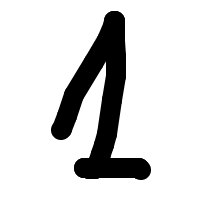

In [23]:
image = Image.open('./digit_images/1/1_49.png')
image

In [21]:
print('This is '+str(predict(image))+'.')

This is 8.


In [13]:
predicted = clf.predict(X_test)
print(f"Classification report for classifier {clf}:\n"
      f"{metrics.classification_report(y_test, predicted)}\n")

Classification report for classifier SVC():
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       0.68      0.87      0.76        15
           2       1.00      0.60      0.75        15
           3       0.86      0.40      0.55        15
           4       0.75      1.00      0.86        15
           5       0.94      1.00      0.97        15
           6       0.92      0.73      0.81        15
           7       0.68      0.87      0.76        15
           8       0.75      1.00      0.86        15
           9       0.92      0.80      0.86        15

    accuracy                           0.83       151
   macro avg       0.85      0.83      0.82       151
weighted avg       0.85      0.83      0.82       151




Confusion matrix:
[[16  0  0  0  0  0  0  0  0  0]
 [ 0 13  0  0  1  0  1  0  0  0]
 [ 0  3  9  1  0  0  0  0  1  1]
 [ 0  2  0  6  1  0  0  5  1  0]
 [ 0  0  0  0 15  0  0  0  0  0]
 [ 0  0  0  0  0 15  0  0  0  0]
 [ 0  0  0  0  2  1 11  0  1  0]
 [ 0  0  0  0  0  0  0 13  2  0]
 [ 0  0  0  0  0  0  0  0 15  0]
 [ 0  1  0  0  1  0  0  1  0 12]]


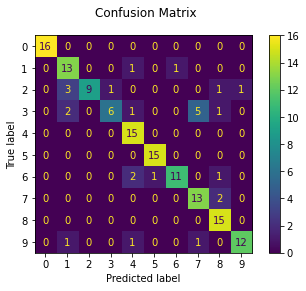

In [14]:
disp = metrics.plot_confusion_matrix(clf, X_test, y_test)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()